# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = "/mnt/c/Users/Ghada/Desktop/estimate_depth/new_Mask/Mask_RCNN-master/"
#os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
print(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/mnt/c/Users/Ghada/Desktop/estimate_depth/new_Mask/Mask_RCNN-master/Mask-CNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/c/Users/Ghada/Desktop/estimate_depth/new_Mask/Mask_RCNN-master/Mask-CNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/c/Users/Ghada/Desktop/estimate_depth/new_Mask/Mask_RCNN-master/Mask-CNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood a

/mnt/c/Users/Ghada/Desktop/estimate_depth/new_Mask/Mask_RCNN-master/


In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [4]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (427, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


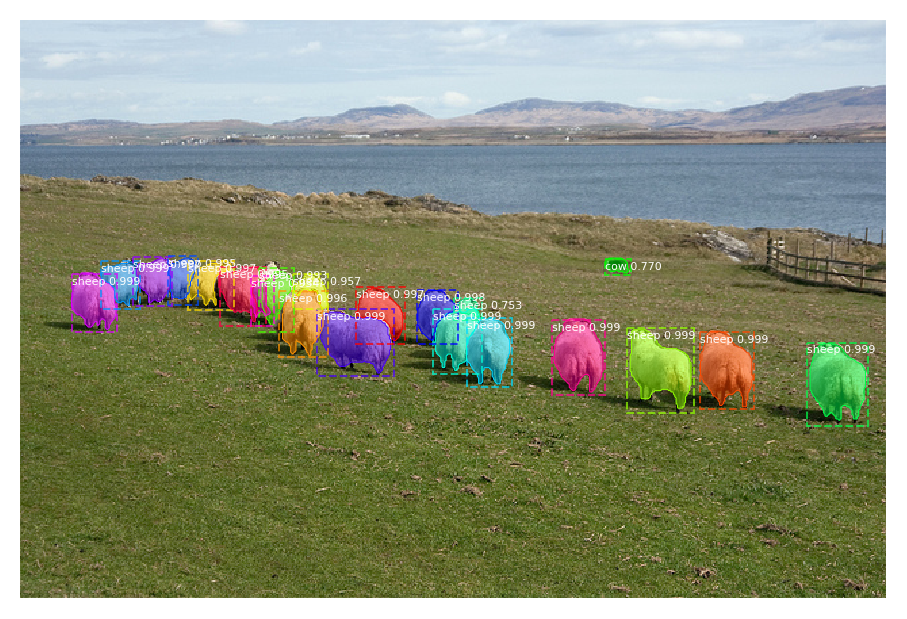

In [6]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [7]:
import os

#data_dir = '/media/ferdyan/NewDisk/Dataset/KITTI_Raw/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/'
#save_folder = '/media/ferdyan/NewDisk/Dataset/KITTI_Raw/2011_09_26/2011_09_26_drive_0001_sync/image_02_new/data/'
data_dir = '/mnt/e/PHD/Raw-kitti/2011_09_26_drive_0022_sync/image_03/data'
save_folder = '/mnt/e/PHD/subdataset-mask/2011_09_26'
output_dir = '2011_09_26_drive_0022_sync/image_03/data'

img_dir = os.listdir(data_dir)
img_dir.sort()

subfolder=output_dir.split('/')

print('new_dir=',save_folder+'/'+subfolder[0]+'/'+subfolder[1]+'/'+subfolder[2])
output_folder= save_folder+'/'+subfolder[0]+'/'+subfolder[1]+'/'+subfolder[2]
if not os.path.exists(save_folder+'/'+subfolder[0]):
        os.mkdir(save_folder+'/'+subfolder[0])
        
if not os.path.exists(save_folder+'/'+subfolder[0]+'/'+subfolder[1]):
        os.mkdir(save_folder+'/'+subfolder[0]+'/'+subfolder[1])   
if not os.path.exists(save_folder+'/'+subfolder[0]+'/'+subfolder[1]+'/'+subfolder[2]):
        os.mkdir(save_folder+'/'+subfolder[0]+'/'+subfolder[1]+'/'+subfolder[2]) 
        
for i, gambar_img in enumerate(img_dir):
    raw = os.path.splitext(gambar_img)[0].split(".")[0] \
            + os.path.splitext(gambar_img)[1]
    img = skimage.io.imread(os.path.join(data_dir, raw))
    
    results = model.detect([img], verbose=1)
    
    r = results[0]
    
    detected = r['class_ids'].size
    
    print(detected)
    
    for i in range(detected):
      
        if r['class_ids'][i] == 3:
            continue
        elif r['class_ids'][i] == 6:
            continue
        elif r['class_ids'][i] == 8:
            continue
        else :
            r['class_ids'][i] = 0
            r['rois'][i] = 0
            r['masks'][i] = 0
            r['scores'][i] = 0
    
    
    raw_name = raw.split('.')
    
    a = visualize.save_image(img, raw_name[0], r['rois'], r['masks'], r['class_ids'], r['scores'], class_names, save_dir=output_folder, mode=3)  
    import cv2
    
    if a == None :
        print("a= ",a)
        black = np.zeros(image.shape).astype(np.uint8)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        #cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    else:
        print("aa = ", raw)
        black = cv2.imread(save_folder+raw)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(output_folder, raw_name[0]+'.png'), black)
    
    #np.asarray(a)
    #image_data = image_data.as
    #a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    #cv2.imshow("a", a)
    #cv2.waitKey(0)
#for i in range(len(img_dir)):
#    raw = os.path.splitext()

new_dir= /mnt/e/PHD/subdataset-mask/2011_09_26/2011_09_26_drive_0022_sync/image_03/data
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00

1

*** No instances in image 0000000018 to draw ******* 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1

*** No instances in image 0000000019 to draw ******* 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1

*** No instances in image 0000000020 to draw ******* 

a=  

1
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

8
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
8
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
9
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

9
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
8
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

8
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
8
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
9
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

8
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
8
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

1
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

1
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

1
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

1

*** No instances in image 0000000335 to draw ******* 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1

*** No instances in image 0000000336 to draw ******* 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape:

3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

10
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
9
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
9
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 

9
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
8
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

8
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
9
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

9
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
10
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
9
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 

6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

1

*** No instances in image 0000000574 to draw ******* 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1

*** No instances in image 0000000575 to draw ******* 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1

*** No instances in image 0000000576 to draw ******* 

a=  

1

*** No instances in image 0000000592 to draw ******* 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
0

*** No instances in image 0000000593 to draw *** 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
0

*** No instances in image 0000000594 to draw *** 

a=  None
Pro

2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

2

*** No instances in image 0000000670 to draw ******* 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1

*** No instances in image 0000000671 to draw ******* 

a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5
a=  None
Processing 1 images
image                    shape:

4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
6
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

7
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1242.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5
a=  None
Processing 1 images
image                    shape: (375, 1242, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3

In [55]:
import os

data_dir = '/media/ferdyan/NewDisk/Mask/Siap/raw/29/images/'
save_folder = '/media/ferdyan/NewDisk/Mask/Siap/raw/29/mask/'

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

img_dir = os.listdir(data_dir)
img_dir.sort()

print(img_dir)

for i, gambar_img in enumerate(img_dir):
    raw = os.path.splitext(gambar_img)[0].split(".")[0] \
            + os.path.splitext(gambar_img)[1]
    print(raw)
    img = skimage.io.imread(os.path.join(data_dir, raw))
    
    results = model.detect([img], verbose=1)
    
    r = results[0]
    
    detected = r['class_ids'].size
    
    print(detected)
    
    for i in range(detected):
        # if r['class_ids'][i] != 3 or r['class_ids'][i] != 6 or r['class_ids'][i] != 8:
        # if r['class_ids'][i] != 3:
        #if r['class_ids'][i] != 3:
        #    r['class_ids'][i] = 0
        #    r['rois'][i] = 0
        #    r['masks'][i] = 0
        #    r['scores'][i] = 0
            
        if r['class_ids'][i] == 3:
            continue
        elif r['class_ids'][i] == 6:
            continue
        elif r['class_ids'][i] == 8:
            continue
        else :
            r['class_ids'][i] = 0
            r['rois'][i] = 0
            r['masks'][i] = 0
            r['scores'][i] = 0
    
    print("raw = ", raw)
    raw_name = raw.split('.')
    a = visualize.save_image(img, raw_name[0], r['rois'], r['masks'], r['class_ids'], r['scores'], class_names, save_dir=save_folder, mode=3) 
    import cv2
    """"if a == None :
        # black = np.zeros(image.shape).astype(np.uint8)
        black = np.zeros((385, 1280, 3)).astype(np.uint8)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        print("he")
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    else: """
        print("aa = ", raw)
        black = cv2.imread(save_folder+raw)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    
    #np.asarray(a)
    #image_data = image_data.as
    #a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    #cv2.imshow("a", a)
    #cv2.waitKey(0)
#for i in range(len(img_dir)):
#    raw = os.path.splitext()

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '00

2
raw =  0015.png
aa =  0015.png
0016.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0016.png
aa =  0016.png
0017.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0017.png
aa =  0017.png
0018.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0034.png
aa =  0034.png
0035.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0035.png
aa =  0035.png
0036.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0036.png
aa =  0036.png
0037.png
Processing 1 images
image                    shape: (385, 1280, 3)    

4
raw =  0053.png
aa =  0053.png
0054.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0054.png
aa =  0054.png
0055.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0055.png
aa =  0055.png
0056.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0072.png
aa =  0072.png
0073.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0073.png
aa =  0073.png
0074.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0074.png
aa =  0074.png
0075.png
Processing 1 images
image                    shape: (385, 1280, 3)    

1
raw =  0091.png
aa =  0091.png
0092.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
raw =  0092.png
aa =  0092.png
0093.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
raw =  0093.png
aa =  0093.png
0094.png
Processing 1 images
image                    shape: (385, 1280, 3)    

In [54]:
import os

data_dir = '/media/ferdyan/NewDisk/Mask/Siap/raw/24/images/'
save_folder = '/media/ferdyan/NewDisk/Mask/Siap/raw/24/mask/'

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

img_dir = os.listdir(data_dir)
img_dir.sort()

print(img_dir)

for i, gambar_img in enumerate(img_dir):
    raw = os.path.splitext(gambar_img)[0].split(".")[0] \
            + os.path.splitext(gambar_img)[1]
    print(raw)
    img = skimage.io.imread(os.path.join(data_dir, raw))
    
    results = model.detect([img], verbose=1)
    
    r = results[0]
    
    detected = r['class_ids'].size
    
    print(detected)
    
    for i in range(detected):
        # if r['class_ids'][i] != 3 or r['class_ids'][i] != 6 or r['class_ids'][i] != 8:
        # if r['class_ids'][i] != 3:
        #if r['class_ids'][i] != 3:
        #    r['class_ids'][i] = 0
        #    r['rois'][i] = 0
        #    r['masks'][i] = 0
        #    r['scores'][i] = 0
            
        if r['class_ids'][i] == 3:
            continue
        elif r['class_ids'][i] == 6:
            continue
        elif r['class_ids'][i] == 8:
            continue
        else :
            r['class_ids'][i] = 0
            r['rois'][i] = 0
            r['masks'][i] = 0
            r['scores'][i] = 0
    
    print("raw = ", raw)
    raw_name = raw.split('.')
    a = visualize.save_image(img, raw_name[0], r['rois'], r['masks'], r['class_ids'], r['scores'], class_names, save_dir=save_folder, mode=3) 
    import cv2
    if a == None :
        # black = np.zeros(image.shape).astype(np.uint8)
        black = np.zeros((385, 1280, 3)).astype(np.uint8)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        print("he")
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    else:
        print("aa = ", raw)
        black = cv2.imread(save_folder+raw)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    
    #np.asarray(a)
    #image_data = image_data.as
    #a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    #cv2.imshow("a", a)
    #cv2.waitKey(0)
#for i in range(len(img_dir)):
#    raw = os.path.splitext()

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '00

1
raw =  0015.png
aa =  0015.png
0016.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0016.png
aa =  0016.png
0017.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0017.png
aa =  0017.png
0018.png
Processing 1 images
image                    shape: (385, 1280, 3)    

2
raw =  0034.png
aa =  0034.png
0035.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
raw =  0035.png
aa =  0035.png
0036.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0036.png
aa =  0036.png
0037.png
Processing 1 images
image                    shape: (385, 1280, 3)    

4
raw =  0053.png
aa =  0053.png
0054.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0054.png
aa =  0054.png
0055.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0055.png
aa =  0055.png
0056.png
Processing 1 images
image                    shape: (385, 1280, 3)    

2
raw =  0072.png
aa =  0072.png
0073.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0073.png
aa =  0073.png
0074.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0074.png
aa =  0074.png
0075.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0091.png
aa =  0091.png
0092.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0092.png
aa =  0092.png
0093.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0093.png
aa =  0093.png
0094.png
Processing 1 images
image                    shape: (385, 1280, 3)    

In [ ]:
test = cv2.imread("/media/ferdyan/NewDisk/Mask_RCNN-master/save/0001.png")
print(test.shape)